Matplotlib is building the font cache; this may take a moment.


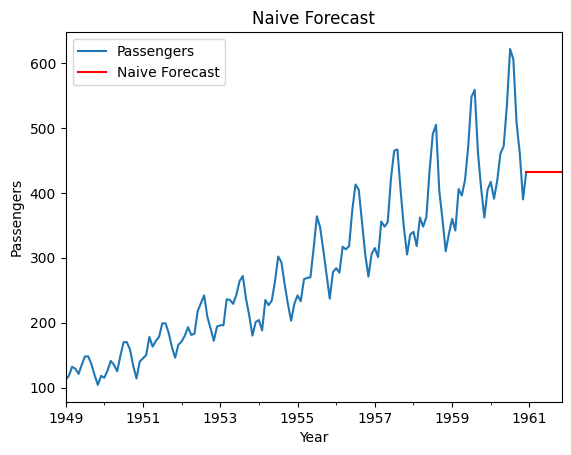

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', 
                   index_col = 'Month', 
                   parse_dates = True)
data.index.freq = 'MS'

# Naive forecast
naive_forecast = data['Passengers'].iloc[-1]

# Create a forecast series
forecast = pd.Series([naive_forecast] * 12, 
                     index = pd.date_range(start=data.index[-1], 
                                           periods = 12, 
                                           freq = 'MS'))

# Plot the data and forecast
data.plot(label = 'Observed')
forecast.plot(label = 'Naive Forecast', 
              color = 'red')
plt.legend()
plt.title("Naive Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

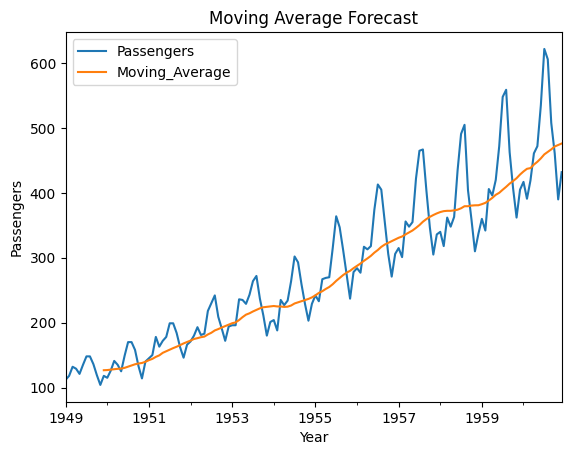

In [2]:
# Moving average
data['Moving_Average'] = data['Passengers'].rolling(window = 12).mean()

# Plot the data and moving average
data[['Passengers', 'Moving_Average']].plot()
plt.title("Moving Average Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

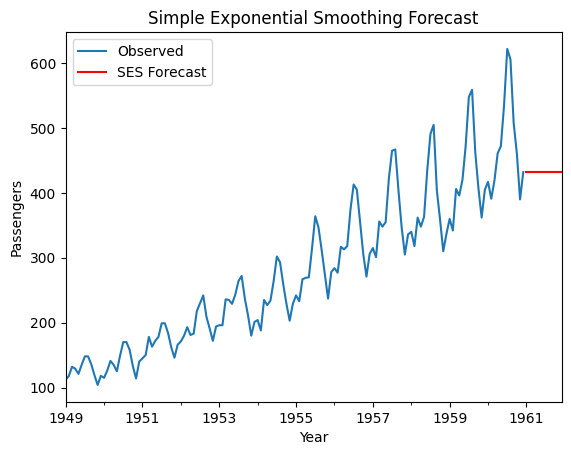

In [3]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Simple Exponential Smoothing
model = SimpleExpSmoothing(data['Passengers'])
fit = model.fit()
forecast = fit.forecast(12)

# Plot the data and forecast
data['Passengers'].plot(label = 'Observed')
forecast.plot(label = 'SES Forecast', color = 'red')
plt.legend()
plt.title("Simple Exponential Smoothing Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

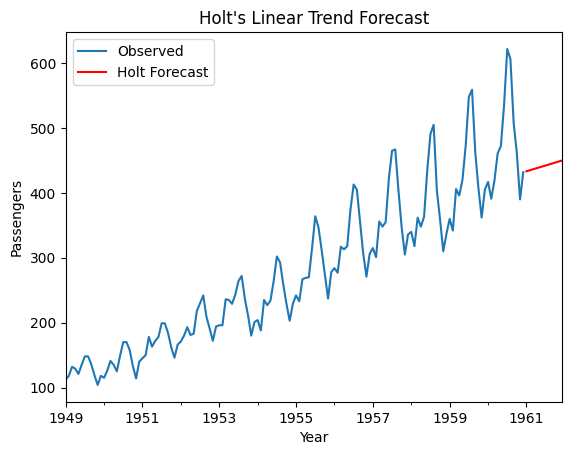

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt's Linear Trend Model
model = ExponentialSmoothing(data['Passengers'], trend = 'add')
fit = model.fit()
forecast = fit.forecast(12)

# Plot the data and forecast
data['Passengers'].plot(label = 'Observed')
forecast.plot(label = 'Holt Forecast', color = 'red')
plt.legend()
plt.title("Holt's Linear Trend Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

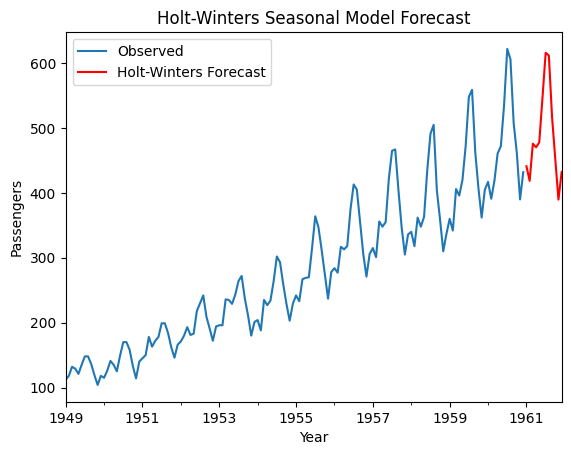

In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Holt-Winters Seasonal Model
model = ExponentialSmoothing(data['Passengers'], seasonal='mul', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

# Plot the data and forecast
data['Passengers'].plot(label='Observed')
forecast.plot(label='Holt-Winters Forecast', color='red')
plt.legend()
plt.title("Holt-Winters Seasonal Model Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

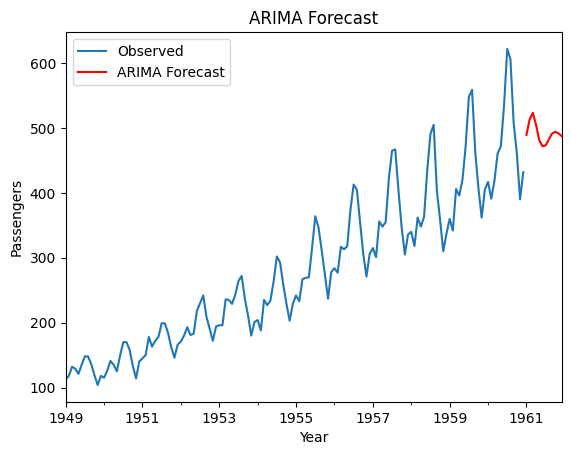

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Passengers'], order = (5, 1, 0))
fit = model.fit()

# Forecast
forecast = fit.forecast(steps = 12)

# Plot the data and forecast
data['Passengers'].plot(label = 'Observed')
forecast.plot(label = 'ARIMA Forecast', color = 'red')
plt.legend()
plt.title("ARIMA Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73532D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96159D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.98219D-03

At iterate   20    f=  3.51493D+00    |proj g|=  6.19111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   4.693D-06   3.515D+00
  F =   3.5149263536966924     

CONVERG

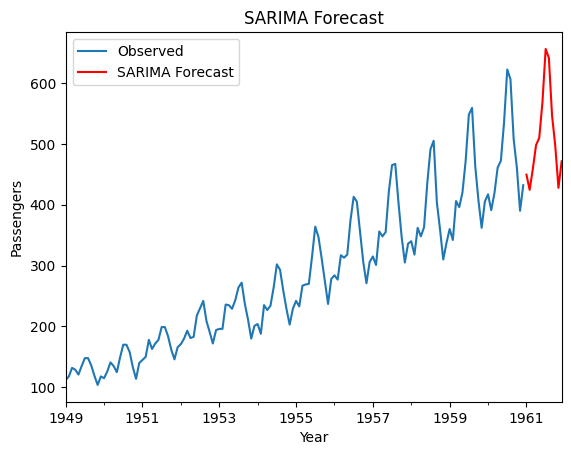

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model = SARIMAX(data['Passengers'], order = (1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit = model.fit()

# Forecast
forecast = fit.get_forecast(steps = 12).predicted_mean

# Plot the data and forecast
data['Passengers'].plot(label = 'Observed')
forecast.plot(label = 'SARIMA Forecast', color = 'red')
plt.legend()
plt.title("SARIMA Forecast")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()